<a href="https://colab.research.google.com/github/AndrewCrossman/DSPS_ACrossman/blob/main/labs/lastlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import scipy 
from scipy import io
from scipy.interpolate import griddata
import pylab as plt

In [6]:
!wget https://github.com/maziarraissi/PINNs/raw/master/appendix/Data/burgers_shock.mat

--2021-12-10 20:16:32--  https://github.com/maziarraissi/PINNs/raw/master/appendix/Data/burgers_shock.mat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/maziarraissi/PINNs/master/appendix/Data/burgers_shock.mat [following]
--2021-12-10 20:16:32--  https://raw.githubusercontent.com/maziarraissi/PINNs/master/appendix/Data/burgers_shock.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207944 (203K) [application/octet-stream]
Saving to: ‘burgers_shock.mat’

burgers_shock.mat   100%[===================>] 203.07K  --.-KB/s    in 0.02s   

2021-12-10 20:16:32 (8.07 MB/s) - ‘burgers_shock.mat’ saved

(100,) (256,) (256, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


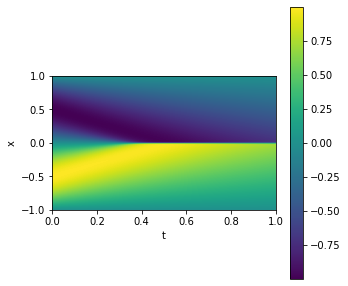

In [11]:
data = scipy.io.loadmat('burgers_shock.mat')
data.keys()
t = data['t'].flatten()
x = data['x'].flatten()
Z = np.real(data['usol'])
print(t.shape, x.shape, Z.shape)
ax = plt.figure(figsize=(5,5)).add_subplot(111)
plt.imshow(Z[::-1],extent=[0,1,-1,1])
ax.set_xlabel("t")
ax.set_ylabel("x");
plt.axes().set_aspect(0.3)
plt.colorbar();

In [14]:
tf.random.set_seed(123)

In [15]:
pi = tf.constant(np.pi, dtype='float32')

In [17]:
def fun_u_0(x):
  return -tf.sin(x * pi)

def fun_u_b(t,x):
  return tf.zero((t.shape[0], 1), dtype="float32")

def fun_res(u, u_t, u_x, u_xx):
  return tf.abs(U_t + u*u_x - .01/pi * u_xx)

In [18]:
n_b = 50
n_0 = 50
n_r = 10000
#boundaries
tmin = 0.
tmax = 1.
xmin = -1.
xmax = 1.

In [19]:
t_0 = tf.ones((n_0, 1), dtype="float32") * tmin
x_0 = tf.random.uniform((n_0, 1), xmin, xmax, dtype="float32")
X_0 = tf.concat([t_0, x_0], axis=1)
X_0

<tf.Tensor: shape=(50, 2), dtype=float32, numpy=
array([[ 0.        , -0.7476938 ],
       [ 0.        ,  0.14550257],
       [ 0.        , -0.4013734 ],
       [ 0.        ,  0.09236717],
       [ 0.        ,  0.44103146],
       [ 0.        ,  0.5779066 ],
       [ 0.        , -0.3846376 ],
       [ 0.        , -0.03657794],
       [ 0.        ,  0.30755043],
       [ 0.        , -0.7580149 ],
       [ 0.        , -0.27416515],
       [ 0.        , -0.5102    ],
       [ 0.        , -0.54608774],
       [ 0.        ,  0.04020071],
       [ 0.        ,  0.7369325 ],
       [ 0.        , -0.42762113],
       [ 0.        , -0.01630592],
       [ 0.        ,  0.34997678],
       [ 0.        , -0.11965895],
       [ 0.        , -0.02140164],
       [ 0.        ,  0.6112704 ],
       [ 0.        ,  0.7948568 ],
       [ 0.        ,  0.27323198],
       [ 0.        ,  0.00240111],
       [ 0.        , -0.03221846],
       [ 0.        ,  0.50451255],
       [ 0.        ,  0.6129718 ],
      

In [21]:
plt.plot(x_0, u_0, '.')

NameError: ignored

In [23]:
plt.scatter(t_0, x_0, c=u_0, marker='o')
plt.xlabel("t")
plt.ylabel("x");

NameError: ignored

In [27]:
t_b = tf.random.uniform((n_b, 1), 0,1, dtype="float32")

<tf.Tensor: shape=(50, 2), dtype=float32, numpy=
array([[ 0.48962688,  1.        ],
       [ 0.5857923 , -1.        ],
       [ 0.36451697,  1.        ],
       [ 0.6550509 , -1.        ],
       [ 0.9075084 , -1.        ],
       [ 0.37557673,  1.        ],
       [ 0.6882372 ,  1.        ],
       [ 0.25384045,  1.        ],
       [ 0.49978244, -1.        ],
       [ 0.5126076 , -1.        ],
       [ 0.7279091 , -1.        ],
       [ 0.58709204,  1.        ],
       [ 0.9021536 ,  1.        ],
       [ 0.5414995 , -1.        ],
       [ 0.19642162, -1.        ],
       [ 0.48716152,  1.        ],
       [ 0.53051543, -1.        ],
       [ 0.18828416, -1.        ],
       [ 0.08821416,  1.        ],
       [ 0.9517412 , -1.        ],
       [ 0.8610064 ,  1.        ],
       [ 0.30999136, -1.        ],
       [ 0.29496896, -1.        ],
       [ 0.9713614 ,  1.        ],
       [ 0.11506426, -1.        ],
       [ 0.6156452 , -1.        ],
       [ 0.07070684,  1.        ],
      

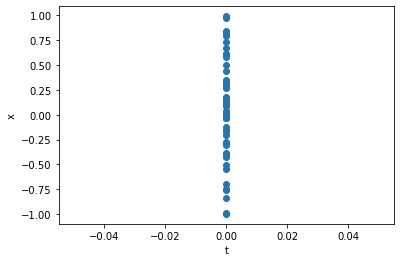

In [30]:
plt.scatter(t_0, x_0, marker='o')
plt.xlabel("t")
plt.ylabel("x");
t_b = tf.random.uniform((n_b, 1), tmin, tmax, dtype="float32")
x_b = xmin + (xmax - xmin) * tf.keras.backend.random_bernoulli((n_b, 1), 0.5, dtype="float32")
X_b = tf.concat([t_b, x_b], axis=1)
X_b